# Continuacion con el ejemplo de regresion lineal en Python

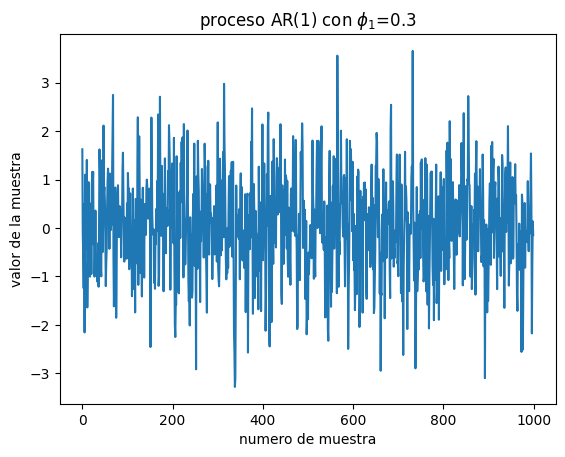

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
mu, sigma = 0, 1
N=1000
Z = np.random.normal(mu, sigma, N)


phi=0.3
X=np.zeros(N)
X[0] = Z[0]

for t in range(1,N):
    X[t] = Z[t] + phi*X[t-1] 

# graficas
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f"proceso AR(1) con $\phi_1$={phi}")
plt.plot(X)
plt.show();


In [2]:
# como hacer para el el phi_1 me salga en  letra griega.
print(f"proceso AR(1) con $\phi_1$={phi}")


proceso AR(1) con $\phi_1$=0.3


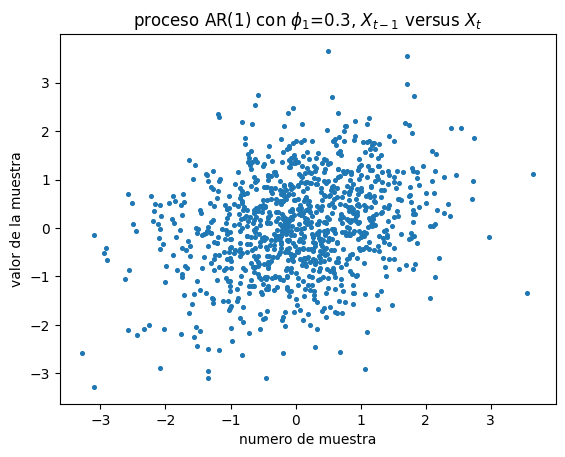

In [3]:
# hacemos un "cross-plot" de graficar X_t versus X_{t-1}
Xt = X[:-1]  # saco la ultima muestra para que el numero de datos sea N-1
Xtm1 = X[1:]  # desde la seguna muestra hasta la ultima, #datos N-1

# graficas
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f"proceso AR(1) con $\phi_1$={phi}, $X_{{t-1}}$ versus $X_t$")
plt.scatter(Xtm1, Xt, s=7)
plt.show();


## Regresion;
Muchos metodos

* las ecuaciones normales
* NumPy
* statsmodels
* las ecuaciones derivadas en clase con covarianza.
Habran mas pero estas son suficientes.

### las ecuaciones normales.

\begin{eqnarray}
X \theta &=& y \\
X^T X \theta &=& X^T y \\
\theta &=& (X^T X)^{-1} X^T y  
\end{eqnarray}
esto es cierto siempre que $(X^T X)^{-1}$ exista. 

In [4]:
n=Xt.size

#  aggregar columna de unos a la matrtiz X
ones = np.ones(shape=(n,1), dtype='float')
Xmat = np.column_stack((ones, Xtm1))
XT = Xmat.transpose()
XTX = XT.dot(Xmat)
XTXInv = np.linalg.inv(XTX)

b = XT.dot(Xt)

theta = XTXInv.dot(b)
theta


array([0.04083613, 0.27576228])

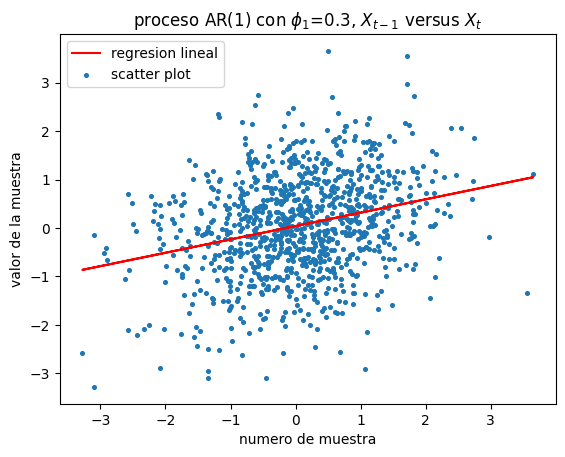

In [5]:
# grafiquemos
def f(x): return theta[1]*x + theta[0]

# graficas
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f"proceso AR(1) con $\phi_1$={phi}, $X_{{t-1}}$ versus $X_t$")
plt.plot(Xtm1, f(Xtm1), c='r', label="regresion lineal")
plt.scatter(Xtm1, Xt, s=7, label="scatter plot")
plt.legend()
plt.show();



## Usando NumPy

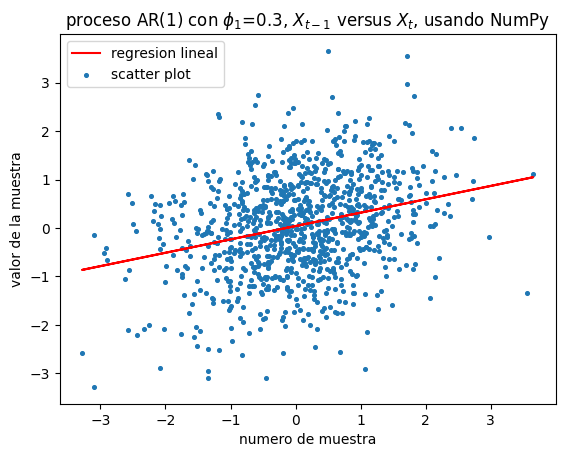

In [6]:
slope, intercept = np.polyfit(Xtm1, Xt, 1)
estimate = intercept + slope*Xtm1

# graficas
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f"proceso AR(1) con $\phi_1$={phi}, $X_{{t-1}}$ versus $X_t$, usando NumPy")
plt.plot(Xtm1, estimate, c='r', label="regresion lineal")
plt.scatter(Xtm1, Xt, s=7, label="scatter plot")
plt.legend()
plt.show();

In [7]:
# verificacion
print("slope intercept using normal equations", theta[1], theta[0])
print("slope intercept using NumPY", slope, intercept)
print("difference between both", theta[0]-intercept, theta[1]-slope)

slope intercept using normal equations 0.27576227541407633 0.04083613196144077
slope intercept using NumPY 0.2757622754140763 0.04083613196144083
difference between both -5.551115123125783e-17 5.551115123125783e-17


## Regresion lineal usando Statsmodels

In [8]:
import statsmodels.api as sm  
y = Xt
x = Xtm1

# add constant (el vector de unos) 
x = sm.add_constant(x)

# fit regresion
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     81.85
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           7.51e-19
Time:                        13:14:24   Log-Likelihood:                -1398.4
No. Observations:                 999   AIC:                             2801.
Df Residuals:                     997   BIC:                             2811.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0408      0.031      1.313      0.190      -0.020       0.102
x1             0.2758      0.030      9.047      0.000       0.216       0.336
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                1.392
Skew:                          -0.070   Prob(JB):                        0.499
Kurtosis:                       3.118   Cond. No.                         1.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
?sm.OLS

In [10]:
model.params

array([0.04083613, 0.27576228])

In [11]:
# verificacion
print("slope intercept using normal equations", theta[1], theta[0])
print("slope intercept using NumPY", model.params[1], model.params[0] )
print("difference between both", theta[0]-model.params[0], theta[1]-model.params[1])

slope intercept using normal equations 0.27576227541407633 0.04083613196144077
slope intercept using NumPY 0.27576227541407644 0.04083613196144087
difference between both -9.71445146547012e-17 -1.1102230246251565e-16


## Regresion basada en las ecuaciones en clase.
\begin{eqnarray}
\text{slope} &=& 
 \frac{\text{Cov}(x,y)}{\mathbb{V}[x]} = \frac{\text{Cov}(x,y)}{{\textrm{Cov}(x,x)}} \\
\text{intercept} &=& \theta_0 = \overline{y} - \theta_1 \overline{x}  \quad 
\end{eqnarray}
El intercepto $\theta_0$ se encuentra de la siguiente forma:

La linea de regresion $y=a + mx$ donde $a$ es el intercepto y $m$ la pendiente pasa por el promedio de los punots $x, y$. Es decir,
que el centro geometrico $(\overline{x}, \overline{y})$ esta sobre la linea de forma que se cumple

$$\overline{y} = \theta_0 + \theta_1 \overline{x} $$

\begin{eqnarray}
\mathbb{V}[x] &=& \text{Cov}(x,x)= \frac{1}{m-1} \sum_{i=1}^m (x_i - \overline{x})^2 \quad, \quad
\text{Cov}(x,y) = \frac{1}{m-1}  \sum_{i=1}^m (x_i - \overline{x}) (y_i - \overline{y})
\end{eqnarray}


In [12]:
# calcule la media
def mean(x):
    return sum(x)/float(len(x))

def covarianza(x,y):
    sub_x = [xi - mean(x) for xi in x]
    sub_y = [yi - mean(x) for yi in y]

    numerator = sum( [ sub_x[i]*sub_y[i] for i in range(len(sub_x))])

    return numerator/(len(x)-1)
                      

theta1 = covarianza(Xtm1, Xt)/covarianza(Xtm1, Xtm1)
theta0 = mean(Xt)- theta1*mean(Xtm1)



In [13]:
# verificacion
print("slope intercept using normal equations", theta[1], theta[0])
print("slope intercept using NumPY", theta1, theta0 )
print("difference between both", theta[0]-theta0, theta[1]-theta1)

slope intercept using normal equations 0.27576227541407633 0.04083613196144077
slope intercept using NumPY 0.27576227541407644 0.04083613196144085
difference between both -7.632783294297951e-17 -1.1102230246251565e-16


# calculo de residuales (residuales)


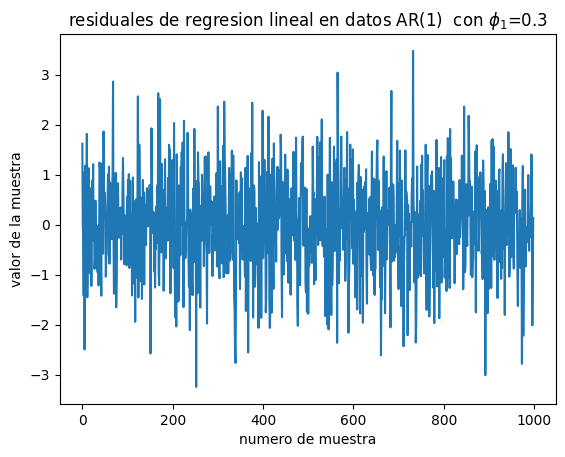

3

In [14]:
res = np.zeros(n)

for i in range(n):
    res[i] = Xt[i] - (intercept + slope*Xtm1[i])


# graficas
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f"residuales de regresion lineal en datos AR(1)  con $\phi_1$={phi}")
plt.plot(res)
plt.show();
3

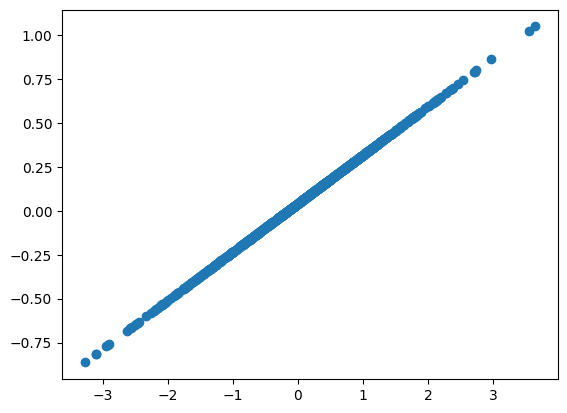

correlation antes [[1.         0.27544095]
 [0.27544095 1.        ]], correlation despues=[[1. 1.]
 [1. 1.]]


In [15]:
## Verificacion de los residuales

# correlacion de Pearson antes
correlation =  np.corrcoef(Xtm1, Xt)

Xtmr = Xt - res
plt.scatter(Xtm1, Xtmr)
plt.show()
correlation_After=np.corrcoef(Xtm1, Xtmr)

print(f"correlation antes {correlation}, correlation despues={correlation_After}")

# Datos multivariados: no veo otra forma que usando las ecuaciones normales.

Repaso de ML:
Las ecuacion normales son
$$A^T A x = A^T y $$
donde $A=(m \times n)$, $y$ es un mector de $m$ dimensiones. Reales todos

Tenemos una serie de datos $X_1, X_2, \cdots X_k$ (ya estos son puntos em $\mathbb{R}^m$) el modelo lineal que estamos plantenado es un $Y$ tal que

$$ Y = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + \cdots + \theta_K X_k$$
Esto lo podemos escribir en forma matricial como 

$$ A \theta = y$$
donde

\begin{eqnarray*}
    A = \begin{pmatrix}
      1 & x_{11} & x_{12} & \cdots x_{1 k} \\
      1 & x_{21} & x_{22} & \cdots x_{2 k} \\
      \vdots & \vdots & \vdots & \vdots \\
      1 & x_{m1} & x_{m2} & \cdots x_{m k} 
    \end{pmatrix} \quad , \quad 
    \theta = \begin{pmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_k \end{pmatrix}
    \quad , \quad 
    y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_m \end{pmatrix}
  \end{eqnarray*}

El problema de minimos cuadrados es plantear la funcion objetivo

$$ J= \| A \theta - y \|^2$$, minimizarla.
con LSQ: y el resultado es las ecuaciones normales

$$ A^T A \theta = A^T y  $$
Si $A^T A$ es invertible, la solucion es  $\theta=(A^T A)^{-1} A^T y$, sino usando regularizacion de Tikhonov

$$ \theta = (A^T A + \lambda I)^{-1} A^T y$$

En ```python``` existe la pseudoniversa $A^+$, simplemente

$$ \theta = A^+ y$$.

Veamos esto en Python



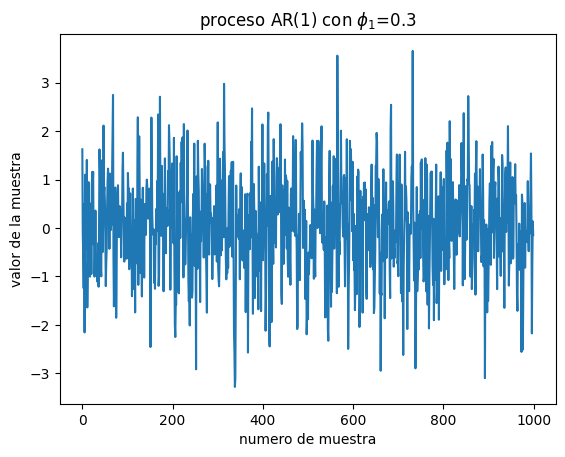

In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
mu, sigma = 0, 1
N=1000
Z = np.random.normal(mu, sigma, N)


phi=0.3
X=np.zeros(N)
X[0] = Z[0]

for t in range(1,N):
    X[t] = Z[t] + phi*X[t-1] 

# graficas
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f"proceso AR(1) con $\phi_1$={phi}")
plt.plot(X)
plt.show();


## Para la regresion multiple
Pensemos que la secuencia de series de tiempo. $X_t, X_{t-1}, \cdots X_{t-k}$. Nos preguntamos la correlacion entre $X_t, X_{t-k}$ esto se puede encontar con ACF (Autocorrelation function). Pero queremos remover los
efectos de las intermedias $X_{t-1}, X_{t-2}, \cdots , X_{t-k+1}$. De esto
se trata el concepto de PACF- Partial Autocorrelation Function  (que veremos a partir de la proxima clase).

In [21]:
# construimos varias version es esta serie con corrimientos (shifts)
# X_{t-1}, X_{t-2}, \cdots , X-{t-k+1}

# hagamos k=4
k=4
n=X.size

# la matriz Y va a tener todas las columnas intermedias desplazadas
Y=np.zeros( shape=(k,n), dtype='float')
Y[0] =X
for i in range(1,k):
    Y[i][:-i]=X[i:]  # shift

# Y es una matriz de 4 columnas que vamos a graficar con un scatter plot



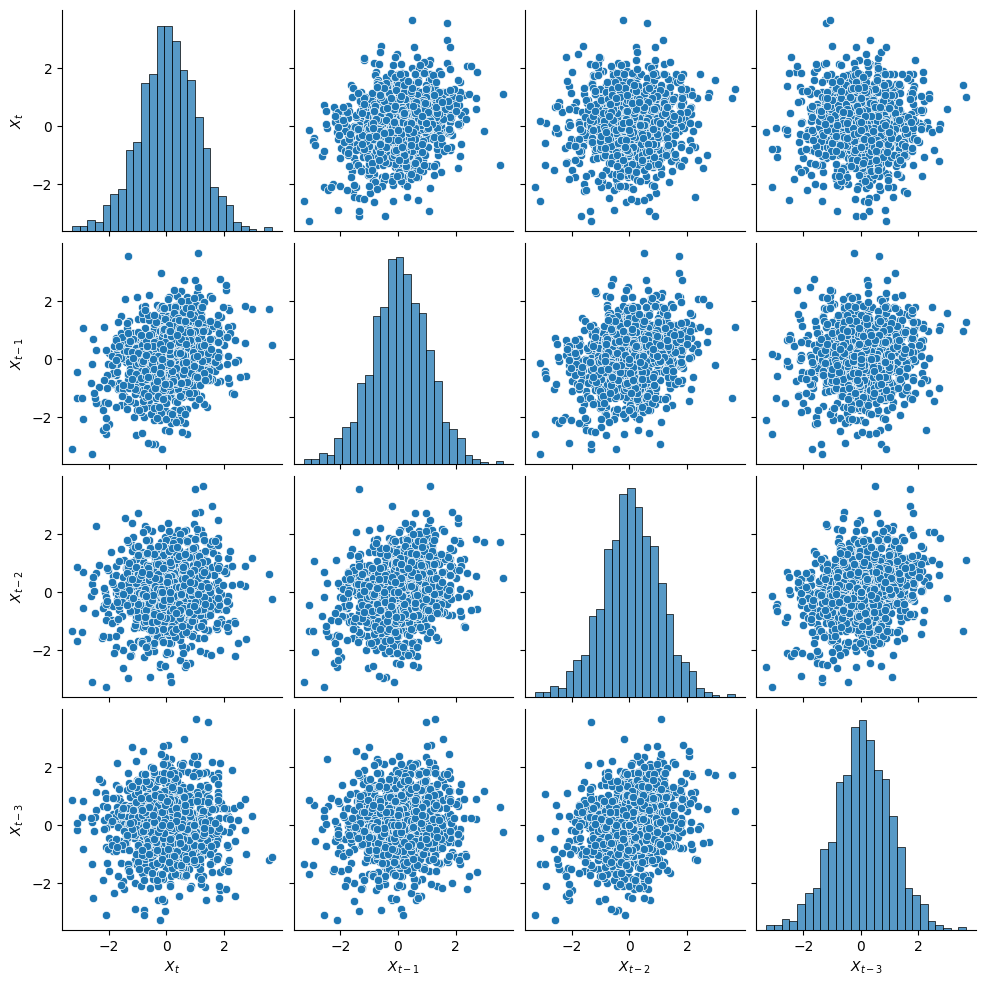

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# creamos un dataframe using de Y data
data =np.transpose(Y)
df = pd.DataFrame(data)

# etiquetas
X1 = "$X_t$"
X2 = "$X_{t-1}$"
X3 = "$X_{t-2}$"
X4 = "$X_{t-3}$"

df.columns=[X1, X2, X3, X4]
sns.pairplot(df);




Con regresion multivariada **removemos** las dependencias internas, de $X_t$ con respecto a $X_{t-1}, X_{t-2}, X_{t-3}$. En ese caso, solo con respecto a $X_{t-1}$.

In [24]:
k=4
n=X.size

# la matriz Y va a tener todas las columnas intermedias desplazadas
Y=np.zeros( shape=(k,n), dtype='float')
Y[0] =X
for i in range(1,k):
    Y[i][:-i]=X[i:]  # shift

In [31]:
# agregar columna de unos a la matriz Y
ones = np.ones( shape=(n,1), dtype='float')

# stack it
Xmat = np.column_stack((ones, Y[1]))  # no sera que poniento Y en vez de Y[1] nos evitamos las proximas 3 lineas?

# es esto necesario?
for i in range(2, k-1):
    # agregar las otras columas
    Xmat = np.column_stack((Xmat, Y[i]))

XT = Xmat.transpose()
XTX = XT.dot(Xmat)
XTXInv = np.linalg.inv(XTX)

b = np.matmul(Xmat.transpose(), Y[0])

theta = XTXInv.dot(b)
theta




array([0.04003958, 0.2714731 , 0.01557307])

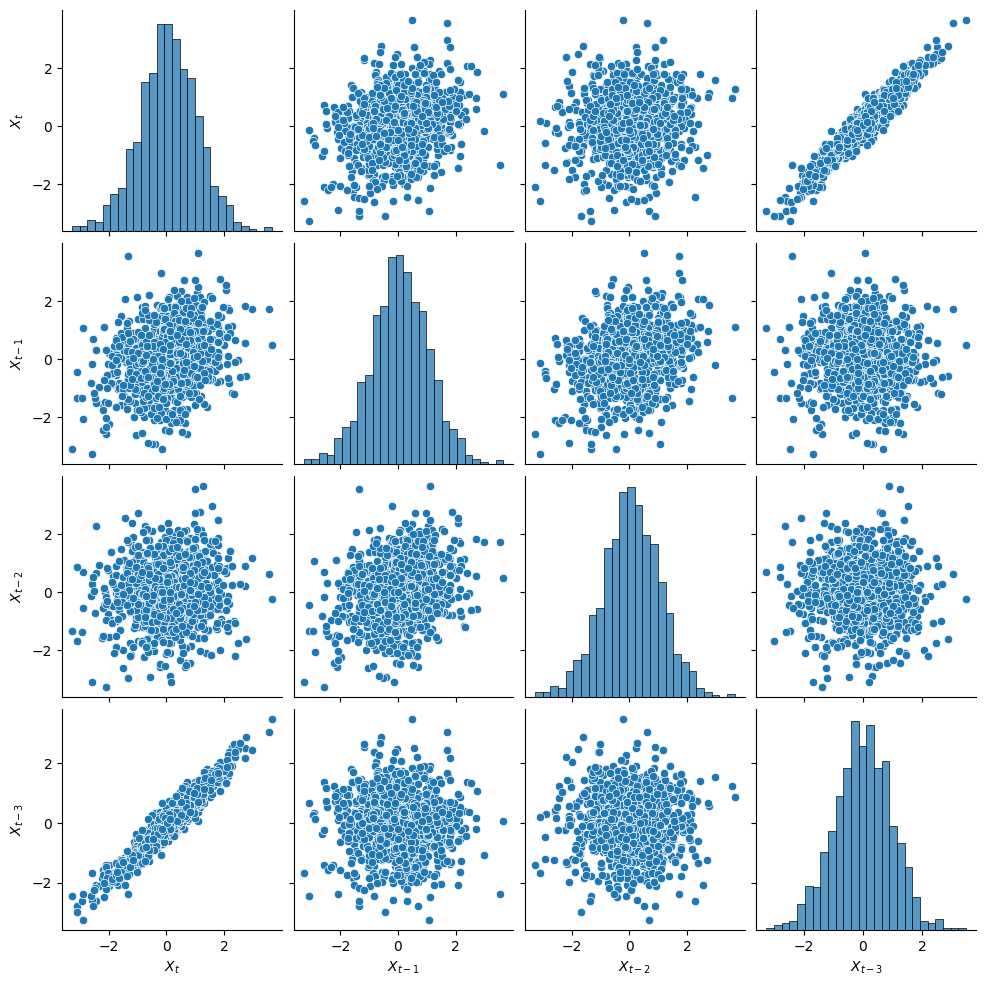

In [28]:
# removemos residuales y graficamos
Y_t = X - theta[0] - sum( theta[j]*Y[j] for j in range(1, k-1))
Y[k-1] = Y_t

# graficamos de nuevo las nubes de puntos.

# creamos un dataframe using de Y data
data =np.transpose(Y)
df = pd.DataFrame(data)

# etiquetas
X1 = "$X_t$"
X2 = "$X_{t-1}$"
X3 = "$X_{t-2}$"
X4 = "$X_{t-3}$"

df.columns=[X1, X2, X3, X4]
sns.pairplot(df);